# Лабараторная №1. Основый предобработки данных 

Группа 3530903/70301  
* Сидорова Елена  
* Ижко Георгий  
* Шергалис Донат  

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='data/credit_3530903_70301.csv'
credit_df = pd.read_csv(path, index_col=0)

In [3]:
# credit_df[credit_df['credit_history'] == 'no credits/all paid']

In [4]:
credit_df.head()

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1,0<=X<200,18.0,existing paid,1301.0,>=7,male mar/wid,2.0,real estate,32.0,own,1.0,unskilled resident,1.0,none,yes,good
2,>=200,6.0,critical/other existing credit,1323.0,>=7,male div/sep,4.0,car,28.0,own,2.0,skilled,2.0,yes,yes,good
3,<0,24.0,existing paid,3123.0,<1,female div/dep/mar,1.0,life insurance,27.0,own,1.0,skilled,1.0,none,yes,bad
4,<0,36.0,existing paid,5493.0,>=7,male single,4.0,no known property,42.0,for free,1.0,skilled,2.0,none,yes,good
5,>=200,9.0,existing paid,1126.0,>=7,male div/sep,4.0,real estate,49.0,own,1.0,skilled,1.0,none,yes,good


| Признак | Описание |
|-|-|
|credit_history      | Credit history (credits taken, paid back duly, delays, critical accounts)
|credit_amount       | Credit amount
|employment          | Present employment, in number of years.
|personal_status     | Personal status (married, single,…) and sex
|residence_since     | Present residence since X years
|property_magnitude  | Property (e.g. real estate)
|age                 | Age in years
|housing             | Housing (rent, own,…)
|existing_credits    | Number of existing credits at this bank
|job                 | Job
|num_dependents      | Number of people being liable to provide maintenance for
|own_telephone       | Telephone (yes,no)
|foreign_worker      | Foreign worker (yes,no)

In [5]:
def filter_good(df = credit_df):
    return df[df['class'] == 'good']

def filter_bad(df = credit_df):
    return df[df['class'] == 'bad']

In [6]:
def filter(col, value, df = credit_df):
    return df[df[col] == value]

def filter_not(col, value, df = credit_df):
    return df[df[col] != value]

In [7]:
credit_df.describe()

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,502.000,501.000,485.000,502.000,502.000,502.000
mean,21.460,3236.230,2.821,35.542,1.420,1.167
std,11.983,2843.499,1.151,11.274,0.586,0.374
min,4.000,0.000,0.000,19.000,1.000,1.000
25%,12.000,1358.000,2.000,27.000,1.000,1.000
50%,18.000,2325.000,3.000,33.000,1.000,1.000
75%,24.000,3959.000,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


In [41]:
# признак  | значения
for col in credit_df: # ['existing_credits', 'credit_history', 'employment', 'personal_status', 'job', 'property_magnitude', 'residence_since', 'duration]:
    values = credit_df[col].unique()
    str_values = str(values)
    if len(str_values) > 300:
        str_values = str_values[:300] + '...'
    print(col, ':', len(values), '\n', str_values, '\n')

checking_status : 4 
 ['0<=X<200' '>=200' '<0' 'no checking'] 

duration : 29 
 [18.  6. 24. 36.  9. 10. 15. 39. 12. 48. 26.  4. 21. 30.  7. 60. 42. 14.
 72. 27. 20.  8. 13. 22. 40. 45. 11. 28. 16.] 

credit_history : 5 
 ['existing paid' 'critical/other existing credit' 'all paid' 'unknown'
 'no credits/all paid'] 

credit_amount : 474 
 [ 1301.  1323.  3123.  5493.  1126.  1216.  1207.  1309.  2360.  6850.
  1413.  8588.   759.  4686.  2687.   585.  2255.   609.  1361.  7127.
  1203.   700.  5507.  3190.  7119.  3488.  1113.  7966.  1532.  1503.
  2302.   662.  2273.  2631.  1311.  3105.  2319.  1374.  3612.  7763.
  3049.  1534.  ... 

employment : 5 
 ['>=7' '<1' '1<=X<4' 'unemployed' '4<=X<7'] 

personal_status : 4 
 ['male mar/wid' 'male div/sep' 'female div/dep/mar' 'male single'] 

residence_since : 6 
 [ 2.  4.  1.  3. nan  0.] 

property_magnitude : 4 
 ['real estate' 'car' 'life insurance' 'no known property'] 

age : 52 
 [32. 28. 27. 42. 49. 38. 24. 36. 34. 45. 26. 20. 54.

### 1. В какой шкале представлены все признаки в наборе?

|признак                | шкала                       | смысл                  | значения               |
|-----------------------|:---------------------------:|:-----------------------|:-----------------------|
|checking_status	    | номинальная (порядковая)    | сумма на счёте DEM     | интервал/отсутствует   |
|duration			    | абсолютная                  | срок                   | натуральное число      |
|credit_history         | номинальная                 | кред.история           | `existing paid`, `critical/other existing credit`, `all paid`, `unknown`, `no credits/all paid`  |
|credit_amount          | абсолютная                  | сумм.кредита           | натуральное число      |
|employment             | номинальная (порядковая)    | стаж                   | `unemployed`, `<1`, `1<=X<4`, `4<=X<7`, `>=7`                          |
|personal_status        | номинальная                 | СП                     | `male mar/wid`, `male div/sep`, `female div/dep/mar`, `male single`    |
|residence_since        | абсолютная                  | ?                      | натуральное число      |
|property_magnitude     | номинальная                 | собственность          | `real estate`,  `car`,  `life insurance`,  `no known property`         |
|age                    | порядковая                  | возраст                | натуральное число      |
|housing                | номинальная                 | где живёт              | `own`, `rent`, `free`  |
|existing_credits       | абсолютная                  | другие кредиты         | натуральное число      |
|job                    | номинальная                 | квалификация           | `unskilled resident`, `skilled`, `high qualif/self emp/mgmt`, `unemp/unskilled non res`|
|num_dependents         | абсолютная                  | кол-во иждивенцев      | число                  |
|own_telephone          | номинальная (бинарная)      | есть телефон?          | `yes`, `none`          |
|foreign_worker         | номинальная (бинарная)      | иностранец?            | `yes`, `no`            |
|class                  | номинальная (бинарная)      | хороший заёмщик?       | `good`, `bad`          |

### 2. Укажите признак с наименьшей дисперсией.

**Ответ**: признак `age`

In [45]:
desc = credit_df.describe().T
desc['std']

duration              11.983
credit_amount       2843.499
residence_since        1.151
age                   11.274
existing_credits       0.586
num_dependents         0.374
Name: std, dtype: float64

In [46]:
desc['std'] / desc['mean']

duration            0.558
credit_amount       0.879
residence_since     0.408
age                 0.317
existing_credits    0.413
num_dependents      0.320
dtype: float64

### 3. Среднее какого признака отличается для двух классов сильнее всего?

Признака `duration`

In [11]:
diff = filter_good().mean() / filter_bad().mean()
diff

duration            0.814
credit_amount       0.863
residence_since     0.959
age                 1.099
existing_credits    1.073
num_dependents      1.019
dtype: float64

In [12]:
abs(diff - 1/diff)/2

duration            0.207
credit_amount       0.148
residence_since     0.042
age                 0.095
existing_credits    0.071
num_dependents      0.019
dtype: float64

### 4. В каком классе больше всего skilled работников?

**Ответ**: В классе good

In [53]:
print('в классе good: ', len(filter('job', 'skilled', good)))
print('в классе bad:', len(filter('job', 'skilled', bad)))

в классе good:  213
в классе bad: 107


In [13]:
skilled = filter('job', 'skilled')
notskilled = filter_not('job', 'skilled')

skilled_good = filter_good(skilled)
notskilled_good = filter_good(notskilled)

print(round(100 * len(skilled_good) / len(skilled), 2), "% skilled работников имеют класс good")
print(round(100 * len(notskilled_good) / len(notskilled), 2), "% прочих работников имеют класс good")

66.56 % skilled работников имеют класс good
68.68 % прочих работников имеют класс good


In [14]:
good = filter_good()
bad = filter_bad()

skilled_bad = filter('job', 'skilled', bad)

print(100 * len(skilled_good) / len(good), "% good работников являются skilled")
print(100 * len(skilled_bad) / len(bad), "% bad работников являются skilled")

63.01775147928994 % good работников являются skilled
65.2439024390244 % bad работников являются skilled


### 5. Есть ли в наборе признаки с выбросами? Какие?

| признак          | смысл     | значения | нормальные значения | комментарий
|:-----------------|:----------|:---------|:--------------------|:------------
| duration         | срок      | 4-72 мес| от неск.месяцев до 7 лет | 72 не является выбросом
| credit_amount    | сумма     | 0-17500 марок | 500-70 000 марок | 17500 не является выбросом <br> 0 является пропуском данных
| residence_since  | в банке   | 0-4 | 0+ | правдоподобно |
| age              | возраст   | 18-74 года | 18+ | возраст 74 года не является выбросом
| existing_credits | кол-во кредитов | 1-4  | 0-парочка | реалистично, почему нет 0?
| num_dependents   | иждивенцы | 1-2 | 0-несколько | нет выбросов

In [15]:
numeric_columns = credit_df.describe().columns
numeric_columns

Index(['duration', 'credit_amount', 'residence_since', 'age',
       'existing_credits', 'num_dependents'],
      dtype='object')

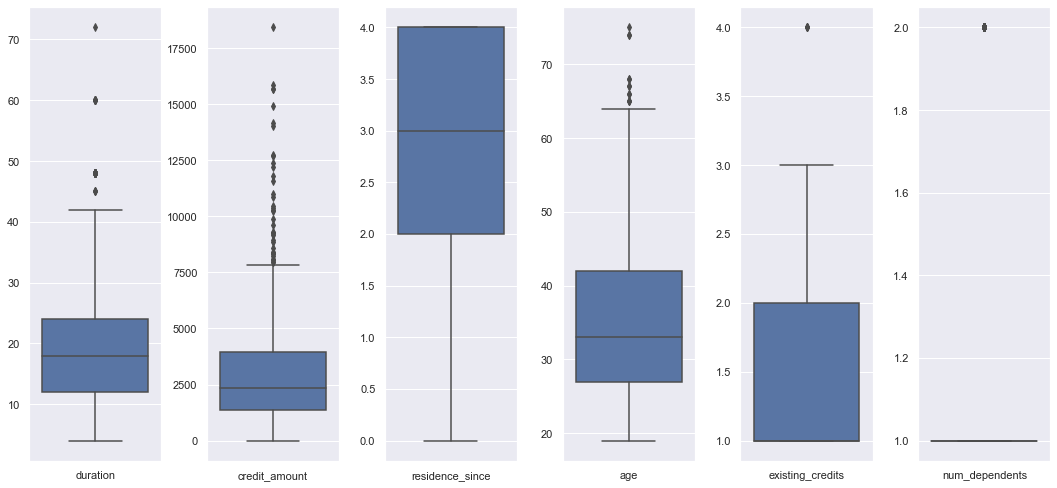

In [16]:
fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(15,7))
fig.tight_layout()
for column, ax in zip(numeric_columns, axs):
    sns.boxplot(ax=ax, data=credit_df[[column]])

### 6. Сколько пропущенных значений в наборе?

**Ответ:** 26 пропущенных значений в признаках `credit_amount` и `residence_since`

In [17]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     502 non-null    object 
 1   duration            502 non-null    float64
 2   credit_history      502 non-null    object 
 3   credit_amount       501 non-null    float64
 4   employment          502 non-null    object 
 5   personal_status     502 non-null    object 
 6   residence_since     485 non-null    float64
 7   property_magnitude  502 non-null    object 
 8   age                 502 non-null    float64
 9   housing             502 non-null    object 
 10  existing_credits    502 non-null    float64
 11  job                 502 non-null    object 
 12  num_dependents      502 non-null    float64
 13  own_telephone       502 non-null    object 
 14  foreign_worker      502 non-null    object 
 15  class               502 non-null    object 
dtypes: float

In [18]:
credit_df.isnull().sum()

checking_status        0
duration               0
credit_history         0
credit_amount          1
employment             0
personal_status        0
residence_since       17
property_magnitude     0
age                    0
housing                0
existing_credits       0
job                    0
num_dependents         0
own_telephone          0
foreign_worker         0
class                  0
dtype: int64

In [19]:
len(credit_df[(credit_df.credit_amount == 0)])

8

In [20]:
def get_missed(df=credit_df):
    return df[(df.credit_amount == 0) | (df.isnull().T.any())]

In [21]:
missed = get_missed()
missed.head()

,checking_status,duration,credit_history,credit_amount,employment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
45,<0,30.0,existing paid,0.0,>=7,male single,4.0,life insurance,31.0,own,1.0,skilled,1.0,none,yes,bad
72,<0,48.0,existing paid,0.0,1<=X<4,female div/dep/mar,2.0,car,31.0,own,1.0,skilled,1.0,yes,yes,bad
87,no checking,12.0,existing paid,0.0,>=7,female div/dep/mar,4.0,no known property,52.0,for free,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
137,0<=X<200,24.0,existing paid,0.0,<1,female div/dep/mar,4.0,car,25.0,own,1.0,unskilled resident,1.0,yes,yes,bad
186,no checking,24.0,critical/other existing credit,0.0,<1,male mar/wid,3.0,no known property,47.0,for free,3.0,skilled,1.0,yes,yes,good


In [22]:
len(missed)

26

### 7. Попытайтесь заполнить пропущенные значения.

In [23]:
credit_filled = credit_df.copy()

In [24]:
desc = credit_df.describe()
desc

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,502.000,501.000,485.000,502.000,502.000,502.000
mean,21.460,3236.230,2.821,35.542,1.420,1.167
std,11.983,2843.499,1.151,11.274,0.586,0.374
min,4.000,0.000,0.000,19.000,1.000,1.000
25%,12.000,1358.000,2.000,27.000,1.000,1.000
50%,18.000,2325.000,3.000,33.000,1.000,1.000
75%,24.000,3959.000,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


In [25]:
credit_filled['credit_amount'].fillna(desc.credit_amount['50%'], inplace=True)
credit_filled['credit_amount'].replace(to_replace=[0], value=desc.credit_amount['50%'], inplace=True)
credit_filled['residence_since'].fillna(0, inplace=True) # вероятно, residence_since=NaN означает, что человек не является клиентом банка, тогда используем 0

len(get_missed(credit_filled))

0

### 8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

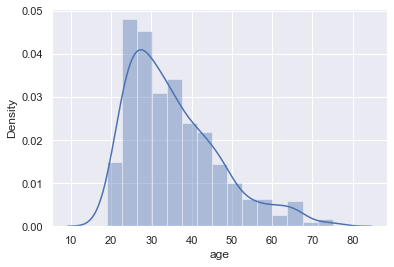

In [26]:
# порядковая
sns.distplot(credit_df.age)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='employment', ylabel='count'>

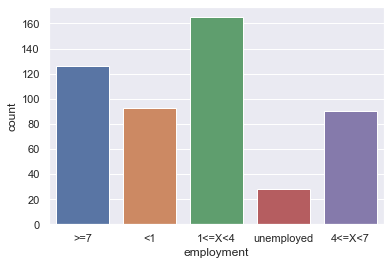

In [27]:
# номинальная (порядковая)
sns.countplot(credit_df.employment)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='own_telephone', ylabel='count'>

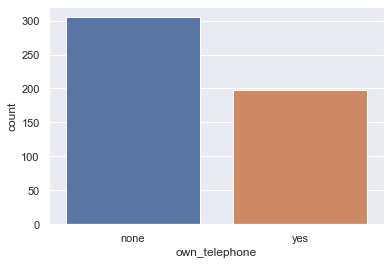

In [28]:
# бинарный
sns.countplot(credit_df.own_telephone)

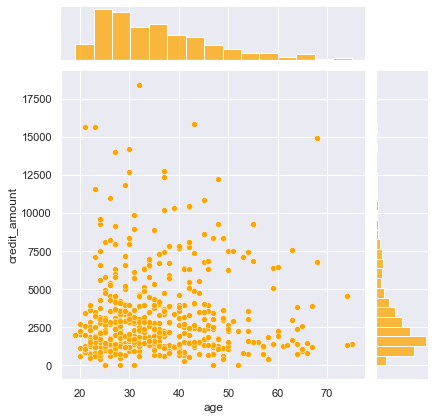

In [29]:
# абсолютная
sns.jointplot(x='age', y='credit_amount', data=credit_df, kind='scatter', color='orange')

### 9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

#### На основании scatter-plot матрицы:

**num_dependents   - credit_amount**   = больше иждивенцев - меньше сумма (сложнее выплачивать)   
**num_dependents   - duration**        = больше иждивенцев - дольше срок (сложнее выплачивать)  
**num_dependents   - age**             = в старшем возрасте меньше иждивенцев  

**credit_amount    - existing_credit** = если уже есть несколько кредитов, то не берут большой кредит  
**credit_amount    - resinence_since** = чем дольше являешься клиентом банка - тем больше сумма кредита  
**credit_amount    - age**             = молодые чаще оформляют кредиты  
**credit_amount    - duration**        = в среднем больше кредит - больше срок

**existing_credits - resinence_since** = возможно, чем больше лет ты клиент в банке - появляется возможность взять еще один кредит  
**existing_credits - age**             = у людей со средним возрастом чаще имеют несколько кредитов  
**existing_credits - duration**        = больше кол-во кредитов - меньше длительность кредита (логично из **credit_amount->duration** и **existing_credits->credit-amount**)  

**age              - duration**        = пожилые не берут на большой срок  
**age              - resinence_since** = в среднем чем старше человек, тем дольше он является резидентом


#### На основании heatmap: 
* признаки **credit_amount** и **duration** сильно связаны, чем больше кредит, тем больше длительность

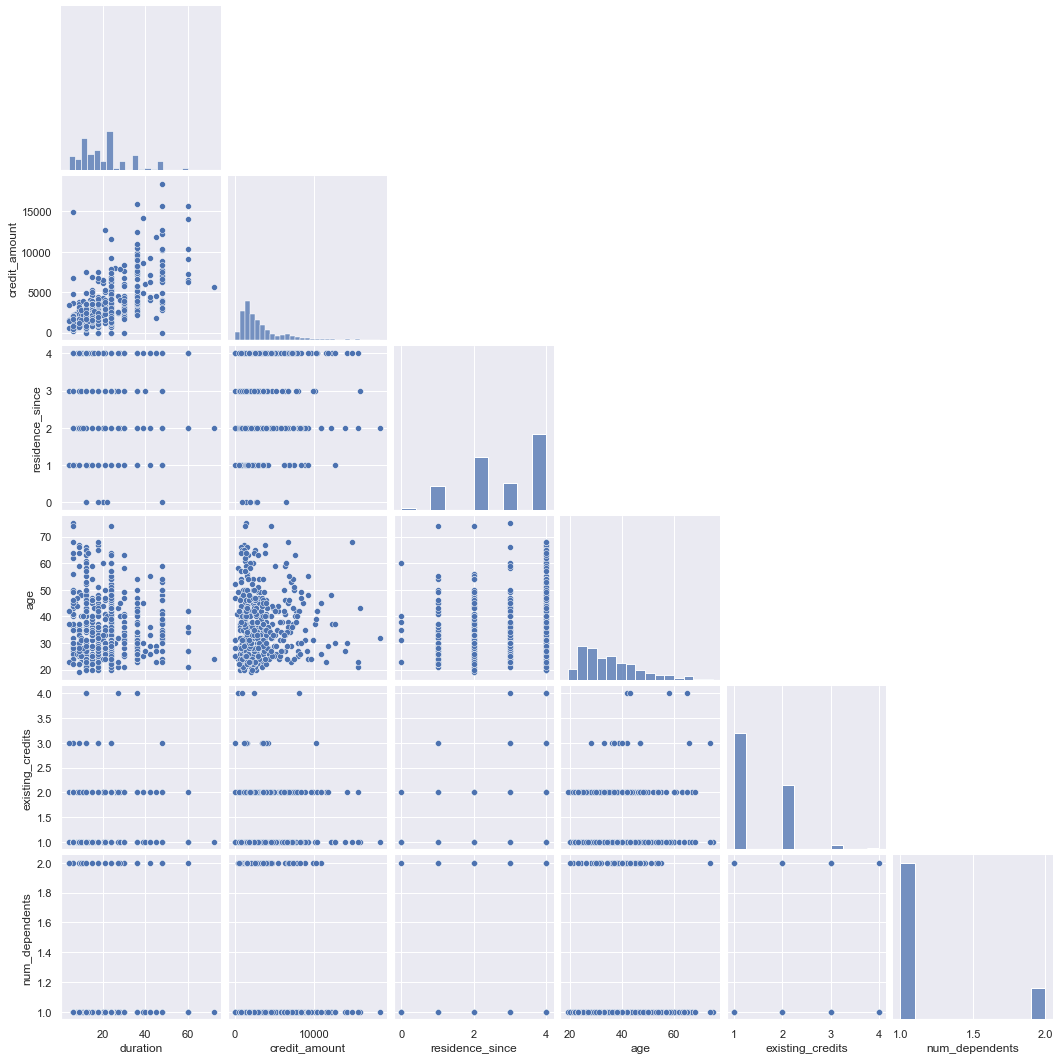

In [30]:
sns.pairplot(credit_df[numeric_columns], corner=True)

Выводы при сопоставлении графиков для классов good и bad:  
**duration - credit_amount** = чтобы кредит одобрили, его длительность должна коррелировать с суммой

In [31]:
# sns.pairplot(good[numeric_columns], corner=True)

In [32]:
# sns.pairplot(bad[numeric_columns], corner=True)

In [35]:
corr_matrix = credit_df.corr()
corr_matrix

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
duration,1.000,0.623,0.014,-0.039,0.003,-0.042
credit_amount,0.623,1.000,0.040,0.047,0.026,0.018
residence_since,0.014,0.040,1.000,0.185,0.120,0.014
age,-0.039,0.047,0.185,1.000,0.151,0.122
existing_credits,0.003,0.026,0.120,0.151,1.000,0.116
num_dependents,-0.042,0.018,0.014,0.122,0.116,1.000


<AxesSubplot:>

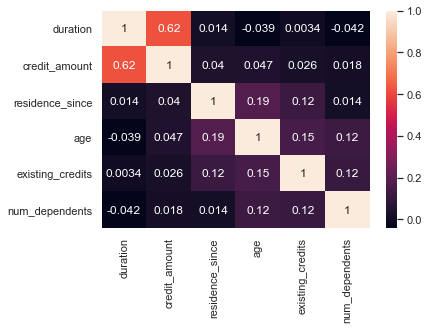

In [36]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

### 10. Какой признак(и) имеет смысл стандартизировать? Почему?


**duration** - можно стандартизовать (имеет смысл?) как входной параметр для алгоритма kNN  
**credit_amount** - можно стандартизовать (имеет смысл?) как входной параметр для алгоритма kNN  
**residence_since** - нет смысла, только 5 значения (от 0 до 4) age - можно стандартизовать (имеет смысл?) как входной параметр для алгоритма kNN  
**existing_credits** - нет смысла, только 4 значения (от 1 до 4)  
**num_dependents** - нет смысла, только 2 значения (от 1 до 2)  

* Признаки `checking_status` и `employment` можно сделать порядковыми, чтобы их можно было сравнивать.
* Признак `foreign_worker` частично дублируется в признаке `job`.


### 11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.

количество судимостей - зная количество судимостей, можно одобрить или не одобрить кредит  
доход за последние полгода - зная сумму, можно оценить адекватность размера кредита  

* Признак `sex` можно извлечь из признака `personal_status`. 